In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


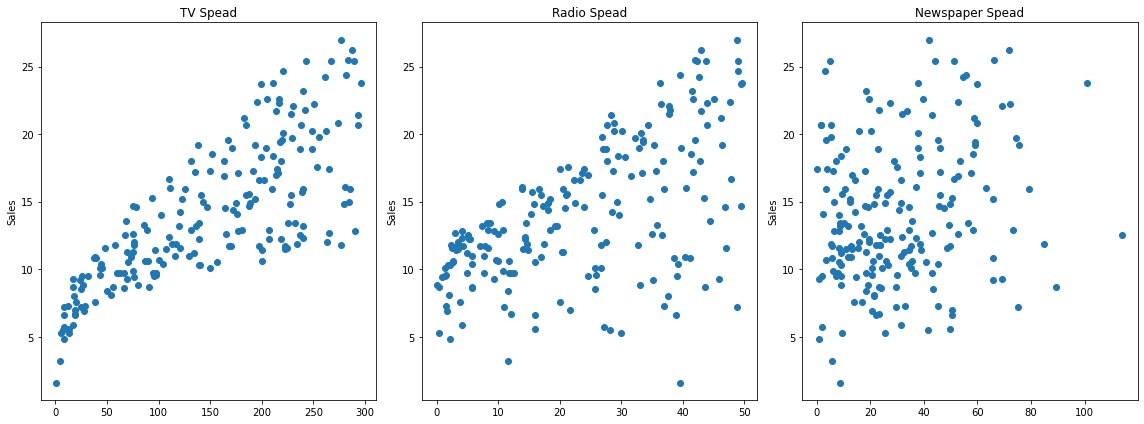

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spead')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spead')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spead')

plt.tight_layout();

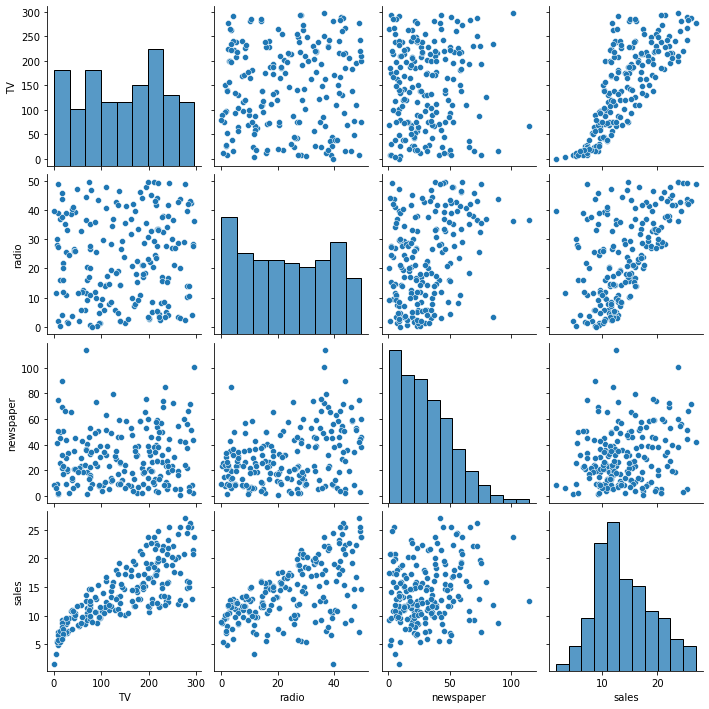

In [12]:
sns.pairplot(df)

In [13]:
X = df.drop('sales', axis=1)

In [15]:
#X

In [16]:
y = df['sales']

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
#help(train_test_split)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
len(df)

200

In [22]:
len(X_train)

140

In [23]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [24]:
len(X_test)

60

In [25]:
from sklearn.linear_model import LinearRegression

In [27]:
#help(LinearRegression)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [31]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [33]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [34]:
test_preditions = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

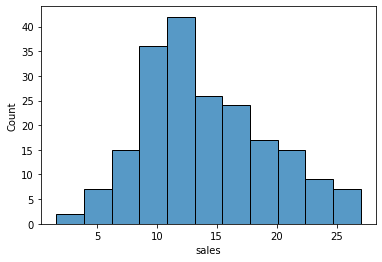

In [37]:
sns.histplot(data=df, x='sales')

In [38]:
mean_absolute_error(y_test, test_preditions)

1.213745773614481

In [39]:
mean_squared_error(y_test, test_preditions)

2.2987166978863782

In [40]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_preditions))

1.516151937599388

In [42]:
test_residuals = y_test - test_preditions

In [44]:
#test_residuals

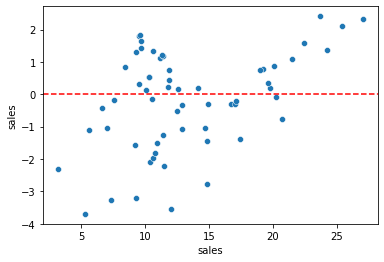

In [48]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

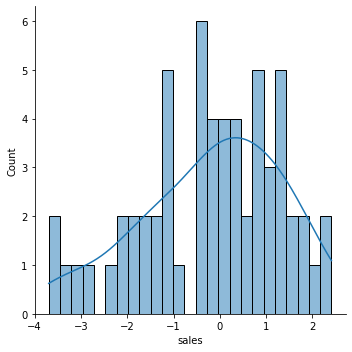

In [49]:
sns.displot(test_residuals, bins=25, kde=True)

In [50]:
import scipy as sp

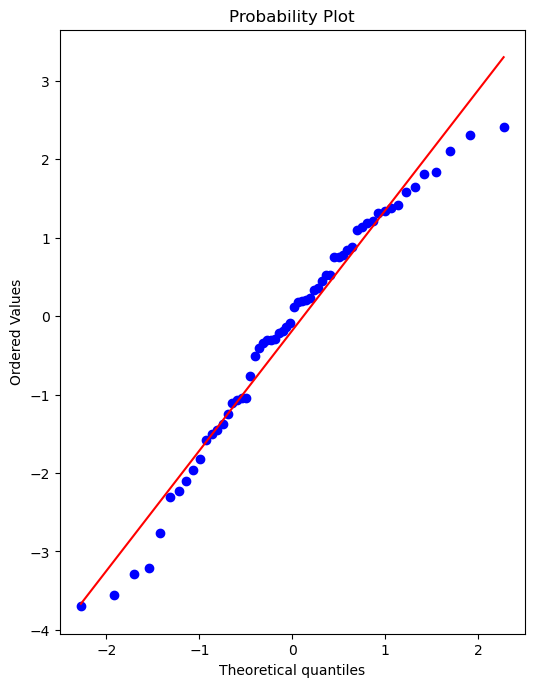

In [52]:
fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
_ = sp.stats.probplot(test_residuals, plot=ax)

In [53]:
final_model = LinearRegression()

In [54]:
final_model.fit(X, y)

LinearRegression()

In [55]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [56]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [58]:
y_hat = final_model.predict(X)

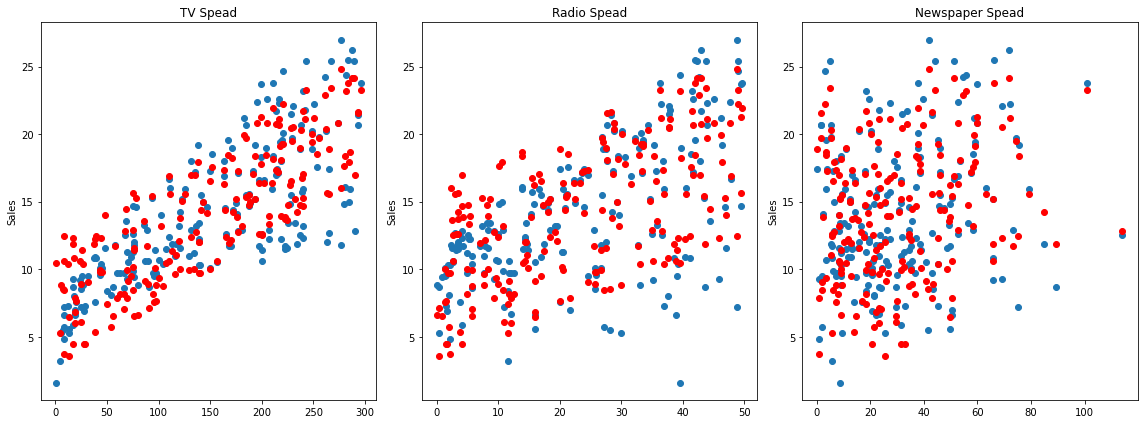

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spead')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spead')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spead')

plt.tight_layout();

In [63]:
from joblib import dump, load

In [64]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [65]:
loaded_model = load('final_sales_model.joblib')

In [66]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [67]:
X.shape

(200, 3)

In [68]:
#149 TV, 22 Radio, 12 Newspaper
campaign = [[149, 22, 12]]

In [69]:
loaded_model.predict(campaign)

array([13.893032])